## Quantitative Methods Assessment 1

In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('coursework_1_data_2019.csv')

In [2]:
df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,2018_pop_female,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling,region,local_authority_type
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,103796,139000,21000,22000,18000,41000,18000,19000,London,london_borough
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,194186,220000,50000,17000,23000,74000,30000,26000,London,london_borough
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,130828,160000,41000,45000,5000,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,98444,161000,33000,42000,19000,50000,10000,7000,South West,unitary_authority
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,87854,130000,37000,52000,17000,8000,3000,13000,East of England,unitary_authority


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   local_authority_area  152 non-null    object
 1   2008_cases_total      152 non-null    int64 
 2   2013_cases_total      152 non-null    int64 
 3   2018_cases_total      152 non-null    int64 
 4   2008_pop_total        152 non-null    int64 
 5   2013_pop_total        152 non-null    int64 
 6   2018_pop_total        152 non-null    int64 
 7   2008_cases_male       152 non-null    int64 
 8   2013_cases_male       152 non-null    int64 
 9   2018_cases_male       152 non-null    int64 
 10  2008_pop_male         152 non-null    int64 
 11  2013_pop_male         152 non-null    int64 
 12  2018_pop_male         152 non-null    int64 
 13  2008_cases_female     152 non-null    int64 
 14  2013_cases_female     152 non-null    int64 
 15  2018_cases_female     152 non-null    in

**Column Addition**

Research Question: What factors of budget would have influenced on the Condition X(Child Obesity) in 2008-2018

In [4]:
df['2008_xrate'] = df['2008_cases_total'] / df['2008_pop_total'] * 100 #regional percentage of x case on the population
df['2013_xrate'] = df['2013_cases_total'] / df['2013_pop_total'] * 100
df['2018_xrate'] = df['2018_cases_total'] / df['2018_pop_total'] * 100

df['cagr_case'] = ((df['2018_cases_total']/df['2008_cases_total'])**(1/10) - 1) #compound annual growth rate from 2008 to 2018 on case
df['cagr_rate'] = ((df['2018_xrate']/df['2008_xrate'])**(1/10) - 1) #compound annual growth rate from 2008 to 2018 on case

df.head()

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,school_awareness,media_awareness,sub_counselling,region,local_authority_type,2008_xrate,2013_xrate,2018_xrate,cagr_case,cagr_rate
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,41000,18000,19000,London,london_borough,0.343402,0.345752,0.419740,0.025527,0.020276
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,74000,30000,26000,London,london_borough,0.158327,0.172643,0.217162,0.036714,0.032103
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,26000,29000,14000,Yorkshire and the Humber,metropolitan_borough,0.158762,0.184828,0.204356,0.038845,0.025567
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,50000,10000,7000,South West,unitary_authority,0.255283,0.243388,0.260915,0.008036,0.002184
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,8000,3000,13000,East of England,unitary_authority,0.196605,0.198414,0.215296,0.016695,0.009123


In [5]:
#df of number of cases and populations(2008, 2013, 2018) / 6 funding fields
df2 = df[['2008_cases_total', '2013_cases_total', '2018_cases_total', '2008_pop_total', '2013_pop_total', '2018_pop_total', 'total_budget', 'clean_air', 'clean_environ', 'health_training', 'school_awareness', 'media_awareness', 'sub_counselling']]
#percentage of x cases(2008, 2013, 2018) per population, annual growth rate and 6 funding fields
df3 = df[['2008_xrate', '2013_xrate', '2018_xrate', 'cagr_case', 'cagr_rate', 'total_budget', 'clean_air', 'clean_environ', 'health_training', 'school_awareness', 'media_awareness', 'sub_counselling']]

In [6]:
df2.describe()

,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,152.000000,152.000000,152.000000,1.520000e+02,1.520000e+02,1.520000e+02,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,1075.296053,1159.513158,1278.605263,3.409223e+05,3.542821e+05,3.682895e+05,2.703092e+05,59368.421053,68427.631579,25111.842105,62631.578947,32967.105263,21802.631579
std,922.378705,997.231047,1069.691997,2.621354e+05,2.788745e+05,2.945969e+05,2.104618e+05,53980.948836,62114.997173,22815.281663,55056.104342,29930.253972,19832.423607
min,5.000000,1.000000,4.000000,2.200000e+03,2.385000e+03,2.440000e+03,2.000000e+03,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000
25%,493.500000,531.750000,592.500000,1.894748e+05,1.880672e+05,1.934285e+05,1.400000e+05,26000.000000,32000.000000,11750.000000,31750.000000,14000.000000,9000.000000
50%,729.000000,794.500000,873.500000,2.540925e+05,2.577715e+05,2.642035e+05,2.000000e+05,41500.000000,48000.000000,18000.000000,45000.000000,25000.000000,16000.000000
75%,1386.000000,1470.250000,1641.500000,3.751225e+05,4.024990e+05,4.094285e+05,3.017500e+05,70000.000000,79000.000000,26500.000000,69750.000000,39750.000000,27250.000000
max,5065.000000,5582.000000,5745.000000,1.411380e+06,1.528154e+06,1.623387e+06,1.170000e+06,297000.000000,333000.000000,130000.000000,340000.000000,203000.000000,99000.000000


In [7]:
df3.describe()

,2008_xrate,2013_xrate,2018_xrate,cagr_case,cagr_rate,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,152.000000,152.000000,152.000000,152.000000,152.000000,1.520000e+02,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,0.309725,0.320978,0.344673,0.018380,0.012377,2.703092e+05,59368.421053,68427.631579,25111.842105,62631.578947,32967.105263,21802.631579
std,0.137058,0.139096,0.138712,0.011060,0.010656,2.104618e+05,53980.948836,62114.997173,22815.281663,55056.104342,29930.253972,19832.423607
min,0.074004,0.041929,0.101388,-0.028358,-0.032141,2.000000e+03,0.000000,0.000000,0.000000,2000.000000,0.000000,0.000000
25%,0.214841,0.226886,0.253539,0.012818,0.005754,1.400000e+05,26000.000000,32000.000000,11750.000000,31750.000000,14000.000000,9000.000000
50%,0.291452,0.298483,0.318207,0.018110,0.009534,2.000000e+05,41500.000000,48000.000000,18000.000000,45000.000000,25000.000000,16000.000000
75%,0.365028,0.381066,0.406704,0.024280,0.018738,3.017500e+05,70000.000000,79000.000000,26500.000000,69750.000000,39750.000000,27250.000000
max,0.824132,0.849613,0.872881,0.051044,0.052165,1.170000e+06,297000.000000,333000.000000,130000.000000,340000.000000,203000.000000,99000.000000


In [14]:
#2008 case, 2018 case, annual growth, total budget

d1 = df2['2008_cases_total'] # 5~5065
d2 = df2['2018_cases_total'] # 1~5582
d3 = df3['cagr_rate'] # -3.21~5.21
d4 = df3['total_budget'] # 2,000~1,170,000

**Normality Check**

In [13]:
from scipy.special import erf
import scipy.stats as stats
import pylab as pl

<function matplotlib.pyplot.show(close=None, block=None)>

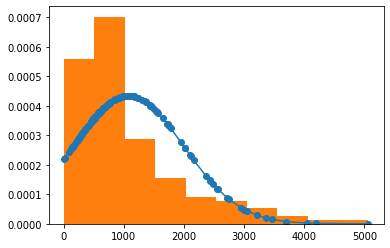

In [14]:
# histogram and normal distribution
d1_ = sorted(d1)
fit = stats.norm.pdf(d1_, np.mean(d1_), np.std(d1_))
pl.plot(d1_, fit, '-o')
pl.hist(d1_, density=True, stacked=True)
pl.show

<function matplotlib.pyplot.show(close=None, block=None)>

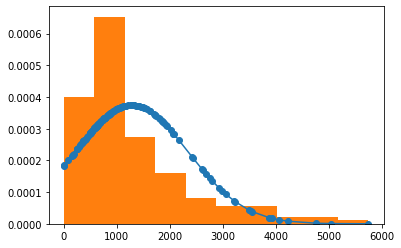

In [15]:
d2_ = sorted(d2)
fit = stats.norm.pdf(d2_, np.mean(d2_), np.std(d2_))
pl.plot(d2_, fit, '-o')
pl.hist(d2_, density=True, stacked=True)
pl.show

<function matplotlib.pyplot.show(close=None, block=None)>

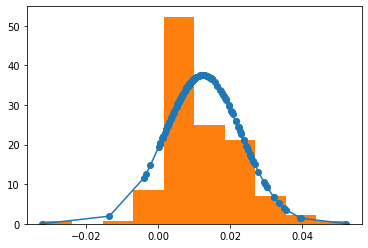

In [16]:
d3_ = sorted(d3)
fit = stats.norm.pdf(d3_, np.mean(d3_), np.std(d3_))
pl.plot(d3_, fit, '-o')
pl.hist(d3_, density=True, stacked=True)
pl.show

<function matplotlib.pyplot.show(close=None, block=None)>

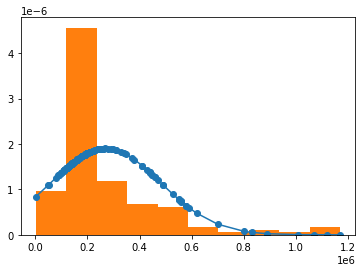

In [17]:
d4_ = sorted(d4)
fit = stats.norm.pdf(d4_, np.mean(d4_), np.std(d4_))
pl.plot(d4_, fit, '-o')
pl.hist(d4_, density=True, stacked=True)
pl.show

Text(0, 0.5, 'residual')

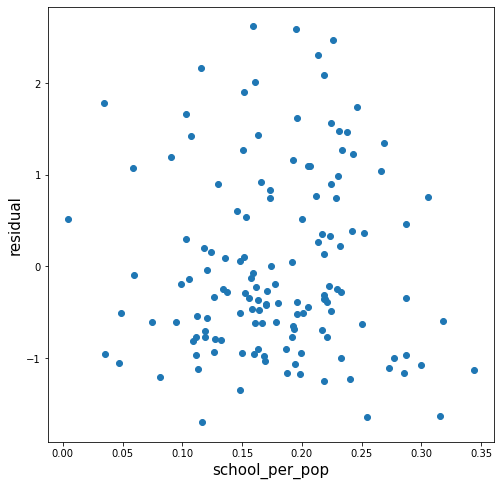

In [33]:
# added after column addition
from scipy.stats import norm
from statsmodels.formula.api import ols

fit = ols('cagr_rate ~ school_per_pop', data=df0_clean_0).fit()
sqrt_mse = np.sqrt(fit.mse_resid)
std_res = fit.resid/sqrt_mse

fig = plt.figure(figsize=(8,8))
fig.set_facecolor('white')
font_size = 15
plt.scatter(df0_clean_0['school_per_pop'], std_res)
plt.xlabel('school_per_pop', fontsize=font_size)
plt.ylabel('residual', fontsize=font_size)

C:\Users\sangb\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

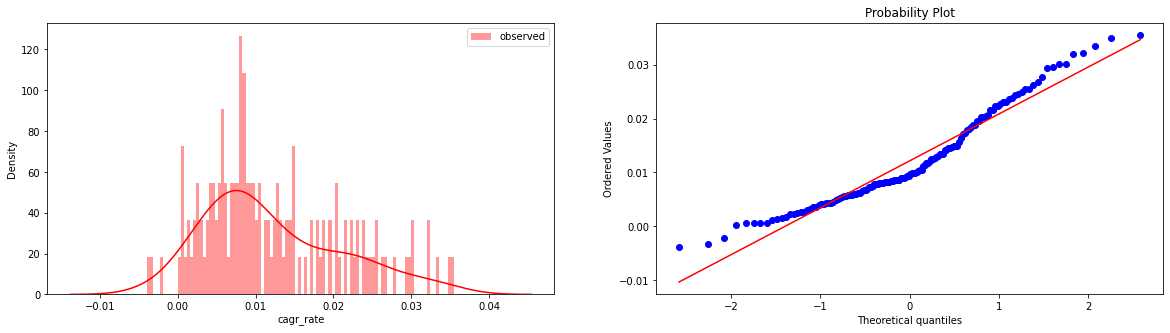

In [34]:
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
stats.probplot(df0_clean_0['cagr_rate'], plot=plt)

mu = df0_clean_0['cagr_rate'].mean()
variance = df0_clean_0['cagr_rate'].var()
sigma = variance**0.5
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
ax1.plot

sns.distplot(ax=ax1, a=df0_clean_0['cagr_rate'], bins=100, color='red', label='observed')
ax1.legend()

In [ ]:
#further normality check and overall descriptive statstics with pandas_profiling

import pandas_profiling
report = df.profile_report()
report.to_file('report.html')

**Erasing Outliers**

In [18]:
#outlier function
def outliers_iqr(data):
    q1, q3 = np.percentile(data, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5*iqr)
    upper_bound = q3 + (1.5*iqr)
    return np.where((data > upper_bound)|(data < lower_bound))

In [21]:
#test
d1_outlier = outliers_iqr(d1)[0]
df.loc[d1_outlier, '2008_cases_total']

#cleaning outliers - no_d1_index: indexes of row which doesn't contain outlier from d1
# 2008 case
no_d1_index = []
for i in df.index:
    if i not in d1_outlier:
        no_d1_index.append(i)
print(len(no_d1_index))
df_clean_d1 = df.loc[no_d1_index].reset_index(drop=True)
d1_clean = df_clean_d1['2008_cases_total']
d1_clean

141


0       593
1       539
2       360
3       456
4       311
       ... 
136    2560
137     119
138    1442
139    2718
140    1170
Name: 2008_cases_total, Length: 141, dtype: int64

In [28]:
# terminating outliers from the whole dataframe
def outlier_cleaner(dataset):
    colname = list(dataset.columns.values) # column name extratction
    o_lst = []

    for col in colname:
        outlier = outliers_iqr(df[col])[0] # outlier index for each column
        o_lst.append(list(outlier))

    outlier_list = np.concatenate(o_lst)

    non_o_index = []
    for i in df.index:
        if i not in outlier_list:
            non_o_index.append(i)

    return dataset.loc[non_o_index].reset_index(drop=True)

**Another Column Addition -  Minimising Population Effect**

In [22]:
#another column addition

df['avg_pop'] = (df['2008_pop_total'] + df['2013_pop_total'] + df['2018_pop_total']) / 3  ## average population throughout 2008-2018
df['avg_pop'] = df['avg_pop'].astype('int')


#budget per capita for each region
df['budget_per_pop'] = df['total_budget'] / df['avg_pop']
df['cleanair_per_pop'] = df['clean_air'] / df['avg_pop']
df['cleanenv_per_pop'] = df['clean_environ'] / df['avg_pop']
df['health_per_pop'] = df['health_training'] / df['avg_pop']
df['school_per_pop'] = df['school_awareness'] / df['avg_pop']
df['media_per_pop'] = df['media_awareness'] / df['avg_pop']
df['counsel_per_pop'] = df['sub_counselling'] / df['avg_pop']

df

,local_authority_area,2008_cases_total,2013_cases_total,2018_cases_total,2008_pop_total,2013_pop_total,2018_pop_total,2008_cases_male,2013_cases_male,2018_cases_male,...,cagr_case,cagr_rate,avg_pop,budget_per_pop,cleanair_per_pop,cleanenv_per_pop,health_per_pop,school_per_pop,media_per_pop,counsel_per_pop
0,Barking and Dagenham,593,619,763,172684,179030,181779,187,190,230,...,0.025527,0.020276,177831,0.781641,0.118090,0.123713,0.101220,0.230556,0.101220,0.106843
1,Barnet,539,594,773,340435,344062,355955,212,204,292,...,0.036714,0.032103,346817,0.634340,0.144168,0.049017,0.066317,0.213369,0.086501,0.074967
2,Barnsley,360,451,527,226755,244010,257883,148,186,212,...,0.038845,0.025567,242882,0.658756,0.168806,0.185275,0.020586,0.107048,0.119400,0.057641
3,Bath and North East Somerset,456,421,494,178625,172975,189334,157,129,156,...,0.008036,0.002184,180311,0.892902,0.183017,0.232931,0.105373,0.277299,0.055460,0.038822
4,Bedford,311,327,367,158185,164807,170463,138,145,156,...,0.016695,0.009123,164485,0.790346,0.224945,0.316138,0.103353,0.048637,0.018239,0.079035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Wirral,2560,2652,2987,310630,312142,342200,965,1044,1103,...,0.015546,0.005763,321657,0.649760,0.214514,0.146118,0.093267,0.127465,0.043525,0.024871
148,Wokingham,119,146,169,160803,165785,166687,50,70,67,...,0.035700,0.031985,164425,0.662916,0.121636,0.249354,0.079063,0.115554,0.060818,0.036491
149,Wolverhampton,1442,1571,1728,239744,252117,264037,416,433,492,...,0.018258,0.008477,251966,0.797727,0.071438,0.107157,0.091282,0.218283,0.198439,0.111126
150,Worcestershire,2718,3061,3237,559135,605974,636832,978,1068,1204,...,0.017629,0.004474,600647,0.782490,0.213104,0.186466,0.094898,0.126530,0.111546,0.049946


In [23]:
df4 = df[['avg_pop', 'budget_per_pop']]
df4.describe()

,avg_pop,budget_per_pop
count,1.520000e+02,152.000000
mean,3.544976e+05,0.799999
std,2.783447e+05,0.362977
min,2.341000e+03,0.630726
25%,1.895730e+05,0.715424
50%,2.557255e+05,0.769843
75%,3.968828e+05,0.821010
max,1.520973e+06,5.115613


<function matplotlib.pyplot.show(close=None, block=None)>

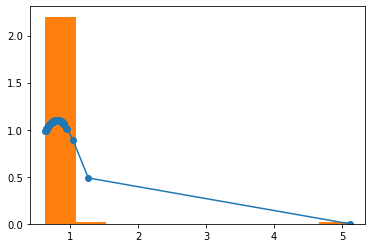

In [24]:
d5 = df4['budget_per_pop']
d5_ = sorted(d5)
fit = stats.norm.pdf(d5_, np.mean(d5_), np.std(d5_))
pl.plot(d5_, fit, '-o')
pl.hist(d5_, density=True, stacked=True)
pl.show

In [26]:
#cleansing outliers
d5_outlier = outliers_iqr(d5)[0]
df4.loc[d5_outlier, 'budget_per_pop']
no_d5_index = []
for i in df.index:
    if i not in d5_outlier:
        no_d5_index.append(i)
print(len(no_d5_index))
df_clean_d5 = df.loc[no_d5_index].reset_index(drop=True)
df_clean_d5
d5_clean = df_clean_d5['budget_per_pop']
d5_clean.describe()

149


count    149.000000
mean       0.766363
std        0.075020
min        0.630726
25%        0.715338
50%        0.767946
75%        0.818537
max        0.954552
Name: budget_per_pop, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

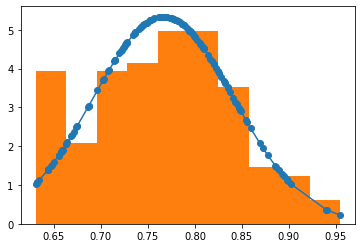

In [27]:
d5_clean_ = sorted(d5_clean)
fit = stats.norm.pdf(d5_clean_, np.mean(d5_clean_), np.std(d5_clean_))
pl.plot(d5_clean_, fit, '-o')
pl.hist(d5_clean_, density=True, stacked=True)
pl.show

**Testing Budget Factors to Growth of X**

In [29]:
df0 = df[['cagr_rate', 'total_budget', 'clean_air', 'clean_environ', 'health_training', 'school_awareness', 'media_awareness', 'sub_counselling']]

In [ ]:
report0 = df0.profile_report()
report0.to_file('report0.html')

In [30]:
df0_clean = outlier_cleaner(df0) 
df0_clean.describe()

,cagr_rate,total_budget,clean_air,clean_environ,health_training,school_awareness,media_awareness,sub_counselling
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,0.013348,185344.827586,40120.689655,46689.655172,16758.620690,44250.000000,22801.724138,14724.137931
std,0.009401,71444.609551,23228.226896,26284.534647,8019.130051,20568.390692,14194.438487,8485.882093
min,-0.013506,50000.000000,4000.000000,4000.000000,1000.000000,4000.000000,2000.000000,1000.000000
25%,0.006770,137000.000000,24000.000000,29000.000000,10750.000000,30000.000000,13000.000000,8000.000000
50%,0.010849,180000.000000,35500.000000,41000.000000,17000.000000,41500.000000,20000.000000,14000.000000
75%,0.020383,220000.000000,50000.000000,62250.000000,22000.000000,57000.000000,29000.000000,19000.000000
max,0.035526,449000.000000,131000.000000,147000.000000,37000.000000,118000.000000,66000.000000,47000.000000


In [31]:
# per capita analysis
df0_ = df[['cagr_rate', 'budget_per_pop', 'cleanair_per_pop', 'cleanenv_per_pop', 'health_per_pop', 'school_per_pop', 'media_per_pop', 'counsel_per_pop']]

In [ ]:
report0_ = df0_.profile_report()
report0_.to_file('report0_.html')

In [32]:
df0_clean_0 = outlier_cleaner(df0_)
df0_clean_0.describe()

,cagr_rate,budget_per_pop,cleanair_per_pop,cleanenv_per_pop,health_per_pop,school_per_pop,media_per_pop,counsel_per_pop
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,0.012128,0.762688,0.165870,0.193793,0.071134,0.178962,0.092589,0.060341
std,0.008852,0.073979,0.064392,0.075522,0.030385,0.063110,0.040685,0.024069
min,-0.003910,0.630726,0.021024,0.016075,0.004417,0.004551,0.015531,0.011136
25%,0.005754,0.715008,0.121467,0.139682,0.046537,0.135098,0.058983,0.041208
50%,0.009534,0.763927,0.168558,0.201152,0.072557,0.175799,0.093562,0.059111
75%,0.018208,0.810821,0.207320,0.246194,0.093432,0.221195,0.117352,0.074851
max,0.035526,0.954552,0.326297,0.407520,0.135027,0.343997,0.198439,0.124494


In [ ]:
report0_0 = df0_clean_0.profile_report()
report0_0.to_file('report0_0.html')

**Correlation**

<AxesSubplot:>

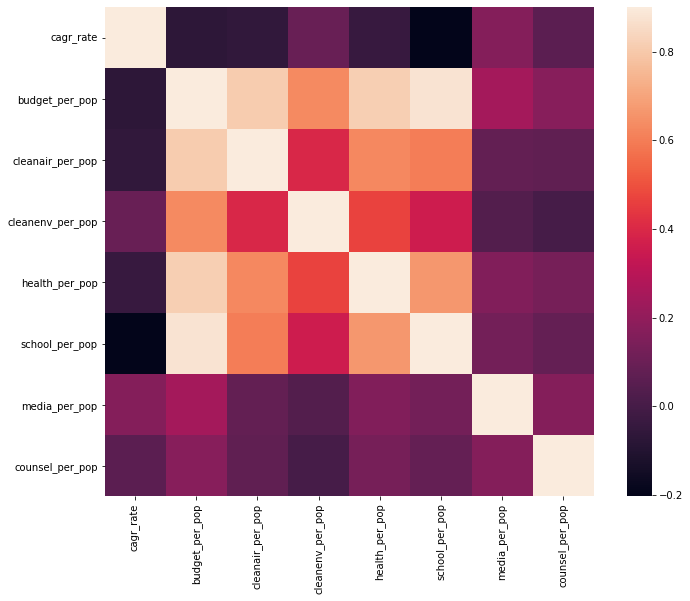

In [35]:
corr2 = df0_.corr()
f2, ax2 = plt.subplots(figsize=(12,9))
sns.heatmap(corr2, vmax=.9, square=True)

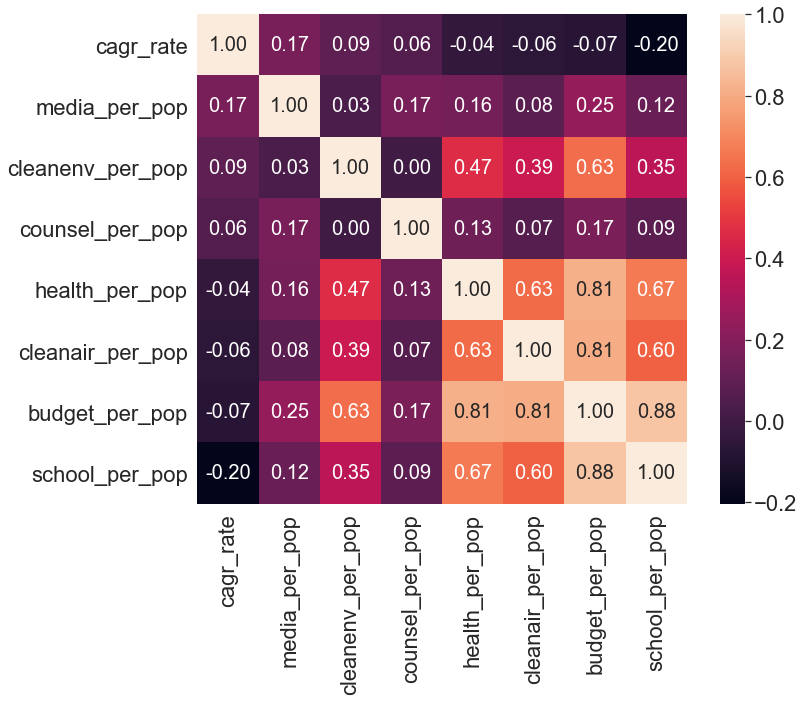

In [36]:
# correlation with outliers
cols2 = corr2.nlargest(10, 'cagr_rate')['cagr_rate'].index
heat2 = np.corrcoef(df0_[cols2].values.T)
sns.set(font_scale=2)
plt.subplots(figsize=(12,9))
hm2 = sns.heatmap(heat2, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols2.values, xticklabels=cols2.values)

<AxesSubplot:>

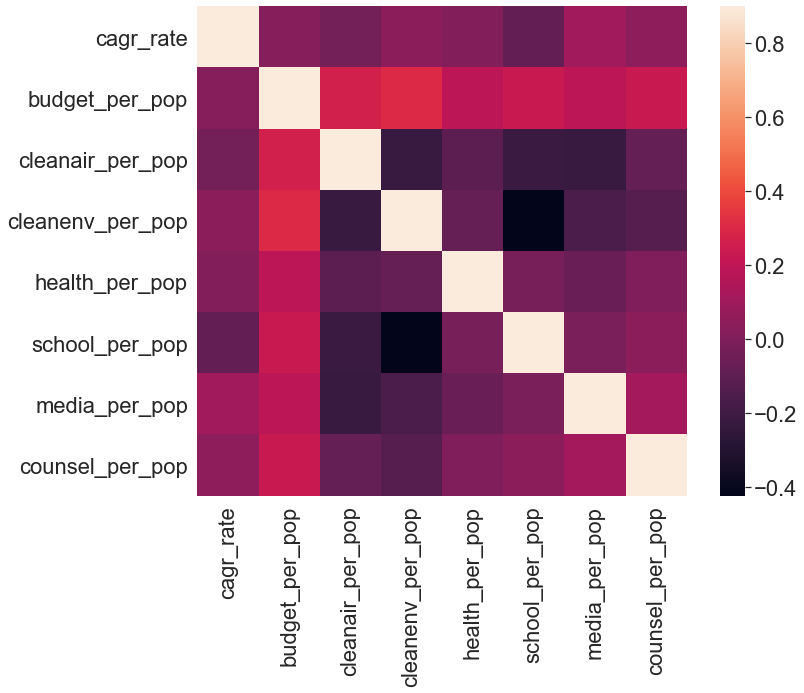

In [37]:
corr3 = df0_clean_0.corr()
f2, ax2 = plt.subplots(figsize=(12,9))
sns.heatmap(corr3, vmax=.9, square=True)

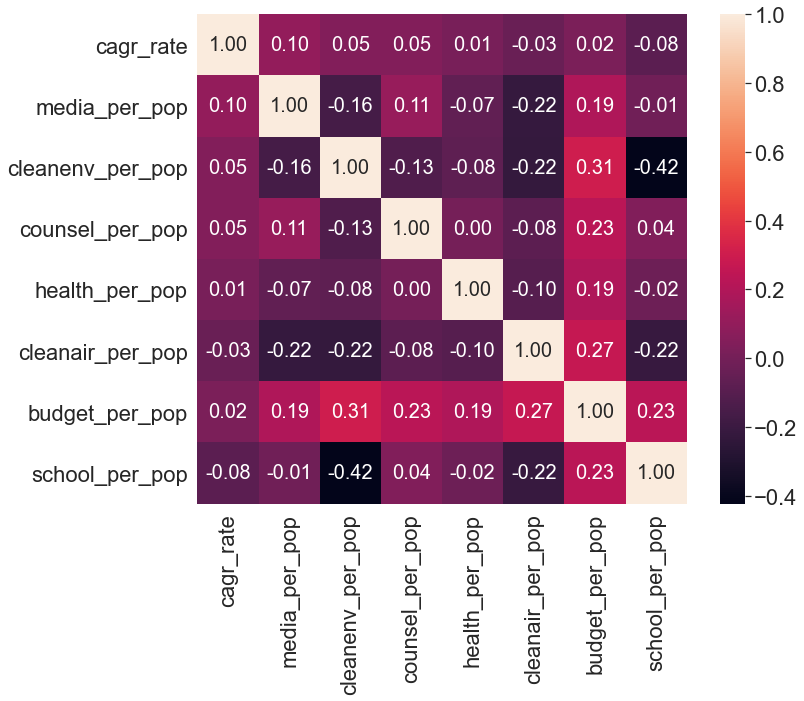

In [38]:
# correlation without outliers

cols3 = corr2.nlargest(10, 'cagr_rate')['cagr_rate'].index # ordered list of cols which show the largest correlation with 'cagr_rate'
heat2 = np.corrcoef(df0_clean_0[cols3].values.T) # Pearson correlation coefficient to each 
sns.set(font_scale=2)
plt.subplots(figsize=(12,9))
hm3 = sns.heatmap(heat2, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 20}, yticklabels=cols2.values, xticklabels=cols2.values)